In [2]:
import pandas as pd
from datetime import datetime
from datetime import date

In [3]:
#сначала проверим по каналам привлечения. Более информативным здесь будет прошлый месяц, т.к. часть каналов, которые есть в текущей классификации, могли не присутствовать год назад и попасть в null
#затем по платформе (os)
#и наконец по дивизиону
channel = pd.read_excel('C:/Users/a.al.kosheleva/analytics/kosheleva_a/factor_1_channel.xlsx', parse_dates=['install_date'])
platform = pd.read_excel('C:/Users/a.al.kosheleva/analytics/kosheleva_a/factor_2_platform.xlsx', parse_dates=['install_date'])
division = pd.read_excel('C:/Users/a.al.kosheleva/analytics/kosheleva_a/factor_3_division.xlsx', parse_dates=['install_date'])

In [4]:
channel.head()

,install_date,channel,conversion,users_install,users_converted,conversion_ma,users_install_ma,users_converted_ma,conversion_ya,users_install_ya,users_converted_ya,conv_vs_ma_percent,conv_vs_ma_pp,conv_vs_ya_percent,conv_vs_ya_pp,install_vs_ma,install_vs_ya,users_conv_vs_ma,users_conv_vs_ya
0,2022-06-30,CRM,31,16,5,31,32,10,7,782,57,0,0,343,24,-50,-98,-50,-91
1,2022-06-30,In-App,1,103630,543,2,36887,555,10,365,36,-50,-1,-90,-9,181,28292,-2,1408
2,2022-06-30,Бесплатные,10,1913,185,11,1712,192,15,506,76,-9,-1,-33,-5,12,278,-4,143
3,2022-06-30,Органика,13,2041,268,13,2241,286,12,4895,565,0,0,8,1,-9,-58,-6,-53
4,2022-06-30,Платные,11,1452,153,13,1655,218,9,2736,258,-15,-2,22,2,-12,-47,-30,-41


In [5]:
#переведем из datetime в дату дату инстала
channel['install_date'] = pd.to_datetime(channel['install_date']).dt.date
platform['install_date'] = pd.to_datetime(platform['install_date']).dt.date
division['install_date'] = pd.to_datetime(division['install_date']).dt.date

In [6]:
import seaborn as sns

Text(0.5, 1.0, 'Разница в конверсии vs прошлый месяц в %, по каналам привлечения')

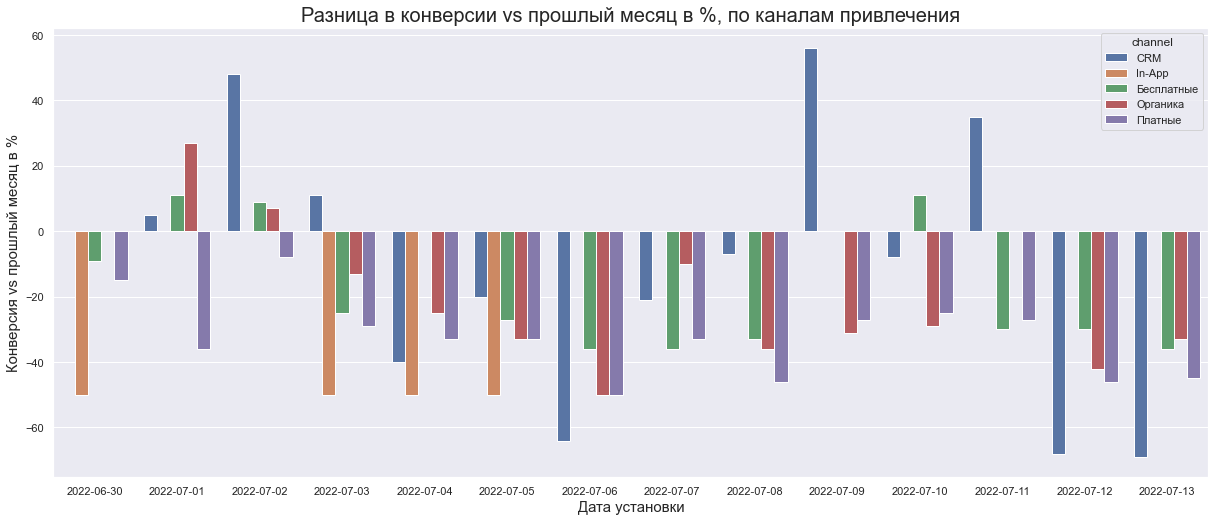

In [7]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
ax = sns.barplot(x="install_date", y="conv_vs_ma_percent", hue="channel", data=channel)
ax.set_xlabel("Дата установки", fontsize = 15)
ax.set_ylabel('Конверсия vs прошлый месяц в %', fontsize = 15)
ax.set_title("Разница в конверсии vs прошлый месяц в %, по каналам привлечения", fontsize = 20)

Text(0.5, 1.0, 'Разница в конверсии vs прошлый месяц в п.п., по каналам привлечения')

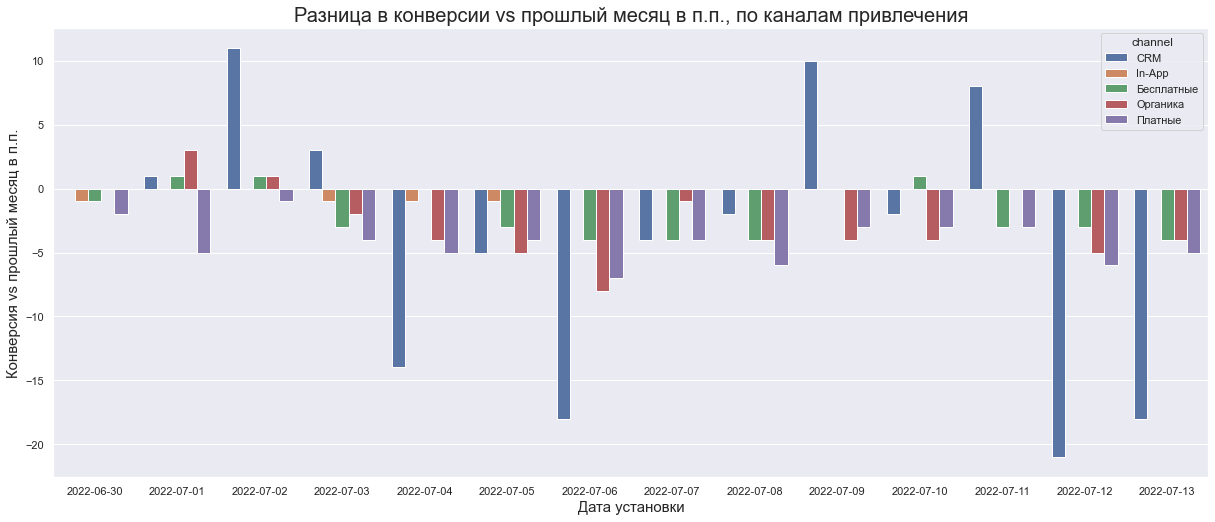

In [9]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
ax = sns.barplot(x="install_date", y="conv_vs_ma_pp", hue="channel", data=channel)
ax.set_xlabel("Дата установки", fontsize = 15)
ax.set_ylabel('Конверсия vs прошлый месяц в п.п.', fontsize = 15)
ax.set_title("Разница в конверсии vs прошлый месяц в п.п., по каналам привлечения", fontsize = 20)

In [10]:
#По сравнению с прошлым месяцем конверсия в % и п.п. падает по каналам неравномерно, в п.п. больше всего выбивается CRM в определенные дни, видимо потому что его конверсия сильно зависит от того, когда мы рассылаем свои emailы и SMS
#Остальные каналы +- равномерно падают, мб чуть побольше органика и платные

Text(0.5, 1.0, 'Разница в кол-ве установок vs прошлый месяц в %, по каналам привлечения')

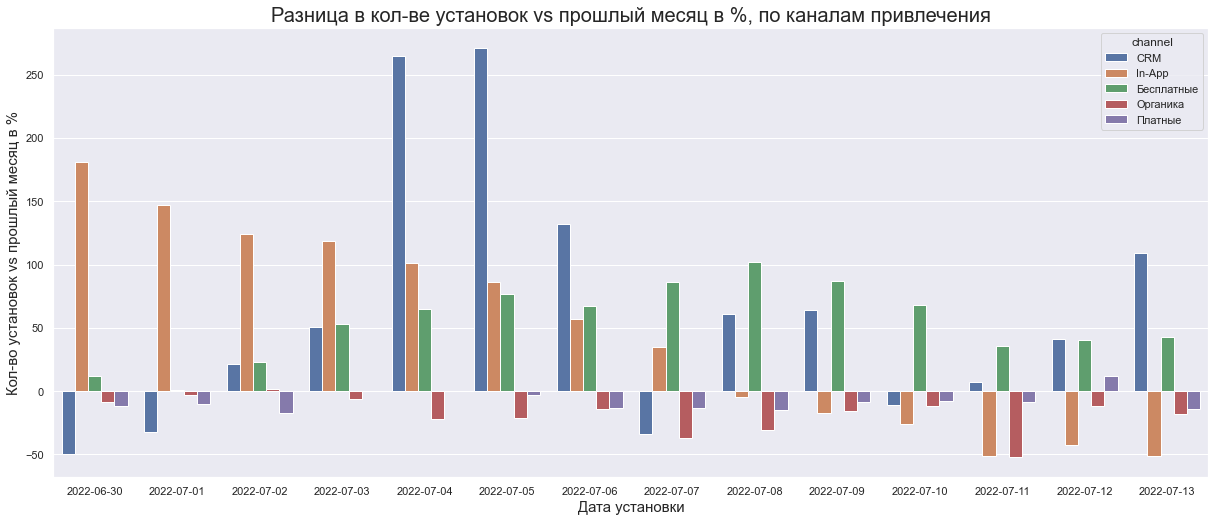

In [11]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
ax = sns.barplot(x="install_date", y="install_vs_ma", hue="channel", data=channel)
ax.set_xlabel("Дата установки", fontsize = 15)
ax.set_ylabel('Кол-во установок vs прошлый месяц в %', fontsize = 15)
ax.set_title("Разница в кол-ве установок vs прошлый месяц в %, по каналам привлечения", fontsize = 20)

In [12]:
#По количеству установок выросли Инап и Бесплатные (до 7 июля), Инап после 7го июля уже не растет в сравнении с месяцем назад, Бесплатные продолжают расти.
#Платные и Органика +- во всех когортах падают по кол-ву установок

Text(0.5, 1.0, 'Разница в кол-ве сконверировавшихся vs прошлый месяц в %, по каналам привлечения')

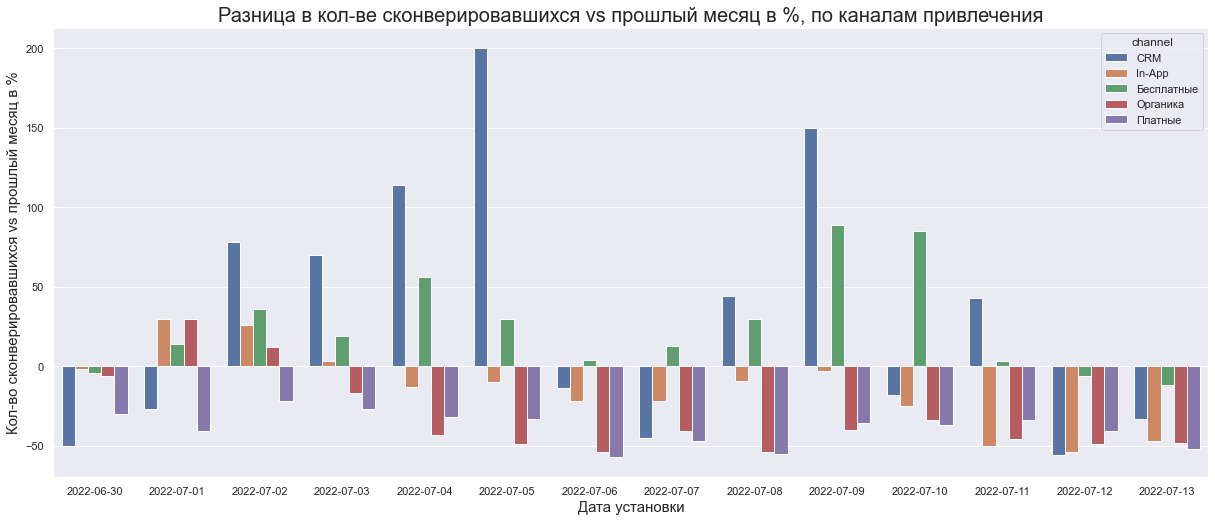

In [13]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
ax = sns.barplot(x="install_date", y="users_conv_vs_ma", hue="channel", data=channel)
ax.set_xlabel("Дата установки", fontsize = 15)
ax.set_ylabel('Кол-во сконверировавшихся vs прошлый месяц в %', fontsize = 15)
ax.set_title("Разница в кол-ве сконверировавшихся vs прошлый месяц в %, по каналам привлечения", fontsize = 20)

In [14]:
#Количество сконвертировавшихся росло для CRM (в некоторых когортах) и бесплатных каналов, остальные показывали негативную динамику почти во всех когортах, особенно платные и органика.
#То есть месяц к месяцу конверсия для бесплатных каналов падала т.к. рост инсталов обгоняет рост новичков. 
#Для инапа частично влияет рост инсталов, частично то, что и новичков стало меньше
#С органикой и платными история другая - там падают и инсталы, и новички

Text(0.5, 1.0, 'Разница в конверсии vs прошлый год в %, по каналам привлечения')

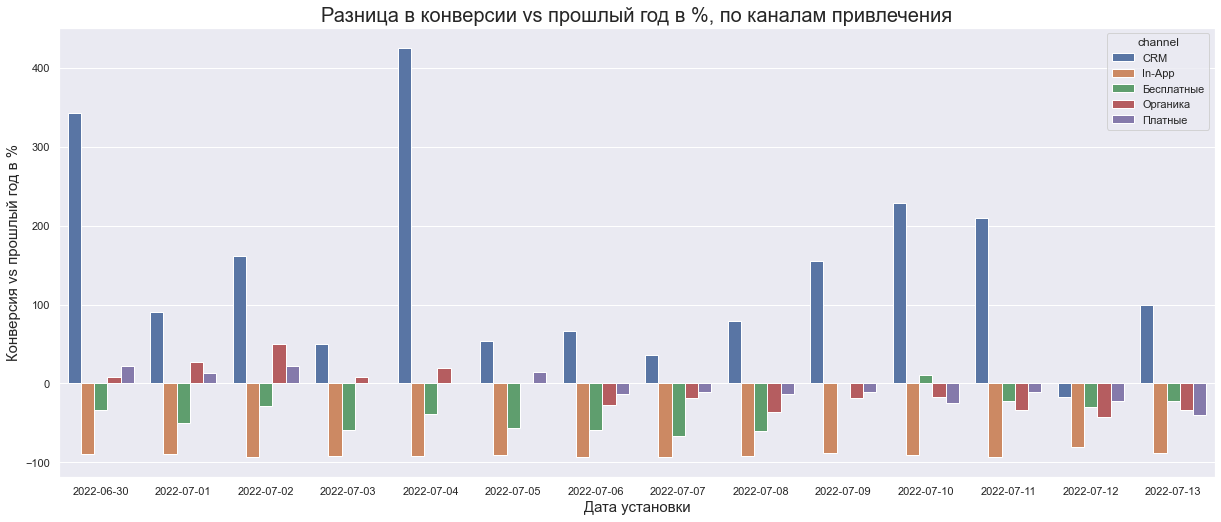

In [15]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
ax = sns.barplot(x="install_date", y="conv_vs_ya_percent", hue="channel", data=channel)
ax.set_xlabel("Дата установки", fontsize = 15)
ax.set_ylabel('Конверсия vs прошлый год в %', fontsize = 15)
ax.set_title("Разница в конверсии vs прошлый год в %, по каналам привлечения", fontsize = 20)

Text(0.5, 1.0, 'Разница в конверсии vs прошлый год в п.п., по каналам привлечения')

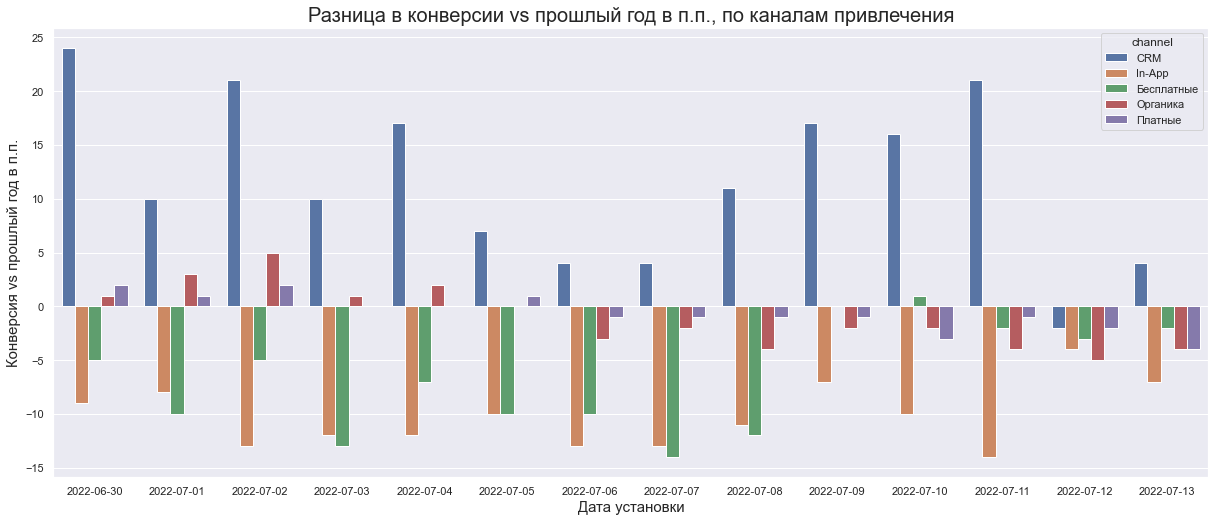

In [16]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
ax = sns.barplot(x="install_date", y="conv_vs_ya_pp", hue="channel", data=channel)
ax.set_xlabel("Дата установки", fontsize = 15)
ax.set_ylabel('Конверсия vs прошлый год в п.п.', fontsize = 15)
ax.set_title("Разница в конверсии vs прошлый год в п.п., по каналам привлечения", fontsize = 20)

In [17]:
#По конверсии по сравнению с прошлым годом подрос в основном CRM, основное падение - у инапа и Бесплатных каналов, хотя с когорт от 9 июля падение бесплатных стало не столь сильным

Text(0.5, 1.0, 'Разница в кол-ве установок vs прошлый год в %, по каналам привлечения')

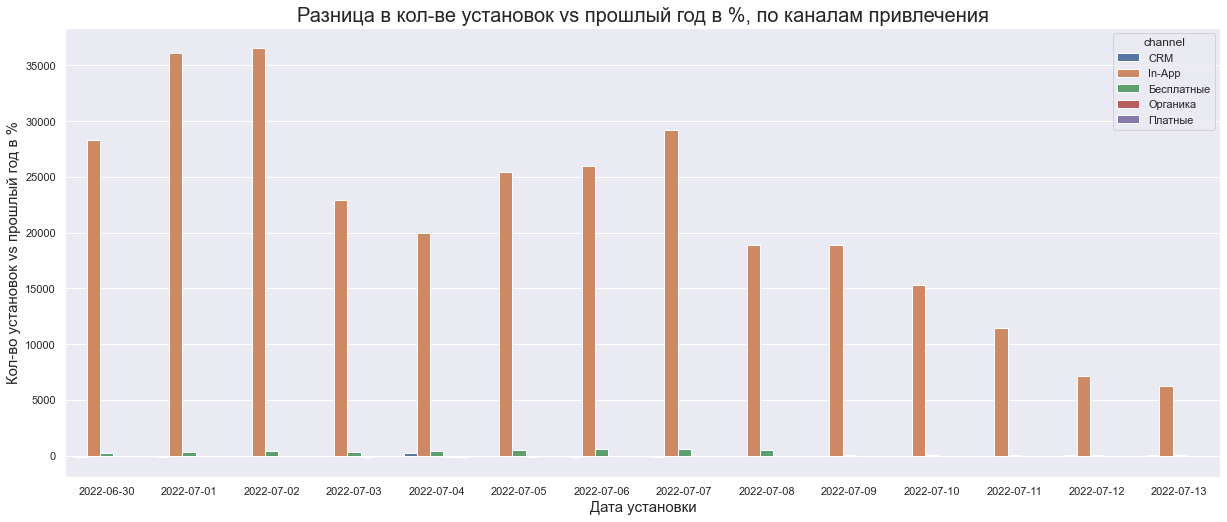

In [18]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
ax = sns.barplot(x="install_date", y="install_vs_ya", hue="channel", data=channel)
ax.set_xlabel("Дата установки", fontsize = 15)
ax.set_ylabel('Кол-во установок vs прошлый год в %', fontsize = 15)
ax.set_title("Разница в кол-ве установок vs прошлый год в %, по каналам привлечения", fontsize = 20)

In [19]:
#Ну и по сравнению с прошлым годом разница в кол-ве установок по инапу перебивает все остальное, тк опять же сильно выросло число инап-источников

Text(0.5, 1.0, 'Разница в кол-ве сконверировавшихся vs прошлый год в %, по каналам привлечения')

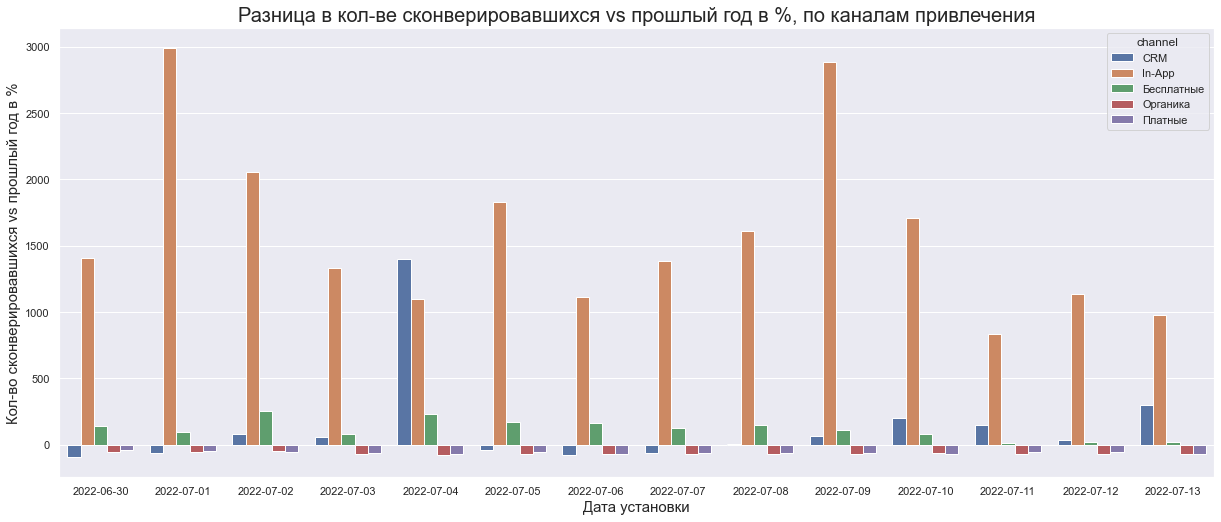

In [20]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
ax = sns.barplot(x="install_date", y="users_conv_vs_ya", hue="channel", data=channel)
ax.set_xlabel("Дата установки", fontsize = 15)
ax.set_ylabel('Кол-во сконверировавшихся vs прошлый год в %', fontsize = 15)
ax.set_title("Разница в кол-ве сконверировавшихся vs прошлый год в %, по каналам привлечения", fontsize = 20)

In [90]:
#Количество сконвертировавшихся по инапу также выросло по сравнению с прошлым годом, но видимо недостаточно, чтобы перекрыть рост инсталов, что вызывает падение конверсии.
#По бесплатным каналам также виден небольшой рост, который не перекрывает рост числа инсталов
#Т.е. проблема скорее в падении конверсии у двух данных каналов, если сравнивать год к году.
#Если же говорить о сравнении месяц к месяцу, здесь конверсия падала у разных когорт неравномерно.

Text(0.5, 1.0, 'Разница в конверсии vs прошлый месяц в %, по OS')

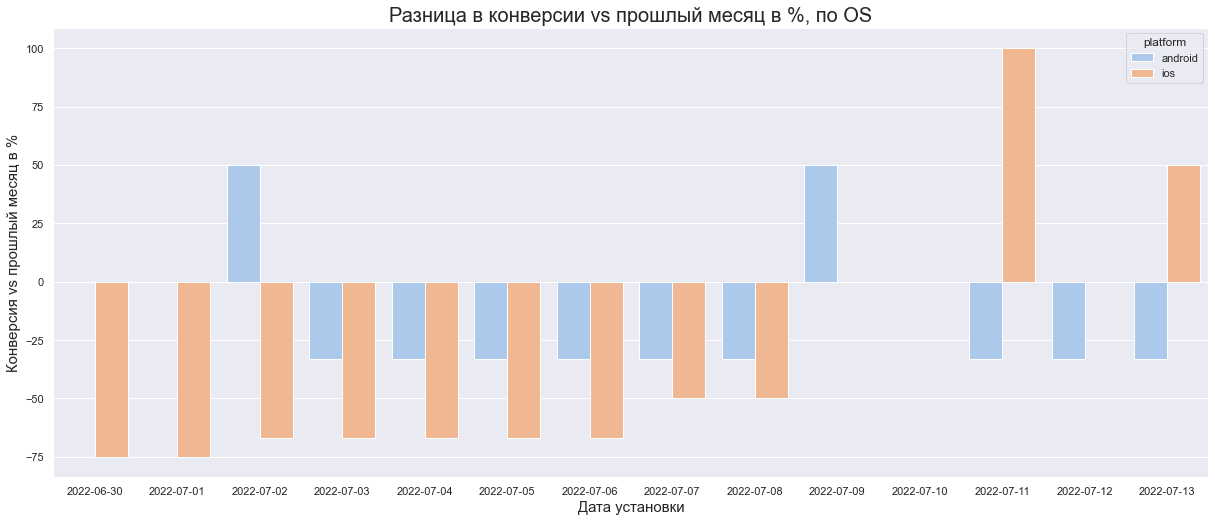

In [21]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_palette("pastel")
ax = sns.barplot(x="install_date", y="conv_vs_ma_percent", hue="platform", data=platform)
ax.set_xlabel("Дата установки", fontsize = 15)
ax.set_ylabel('Конверсия vs прошлый месяц в %', fontsize = 15)
ax.set_title("Разница в конверсии vs прошлый месяц в %, по OS", fontsize = 20)

Text(0.5, 1.0, 'Разница в конверсии vs прошлый месяц в п.п., по OS')

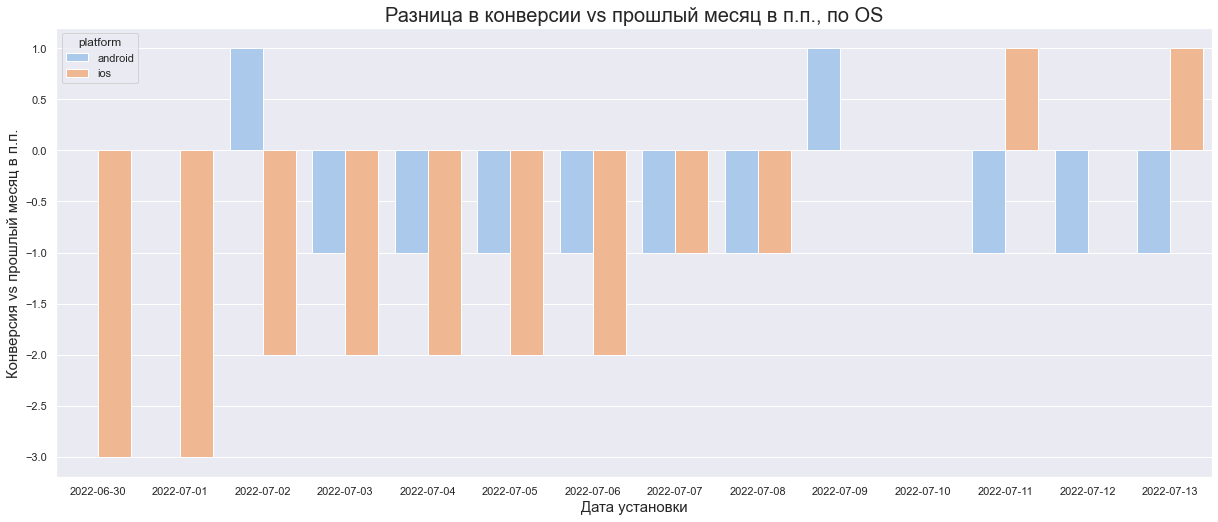

In [22]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_palette("pastel")
ax = sns.barplot(x="install_date", y="conv_vs_ma_pp", hue="platform", data=platform)
ax.set_xlabel("Дата установки", fontsize = 15)
ax.set_ylabel('Конверсия vs прошлый месяц в п.п.', fontsize = 15)
ax.set_title("Разница в конверсии vs прошлый месяц в п.п., по OS", fontsize = 20)

Text(0.5, 1.0, 'Разница в кол-ве установок vs прошлый месяц в %, по OS')

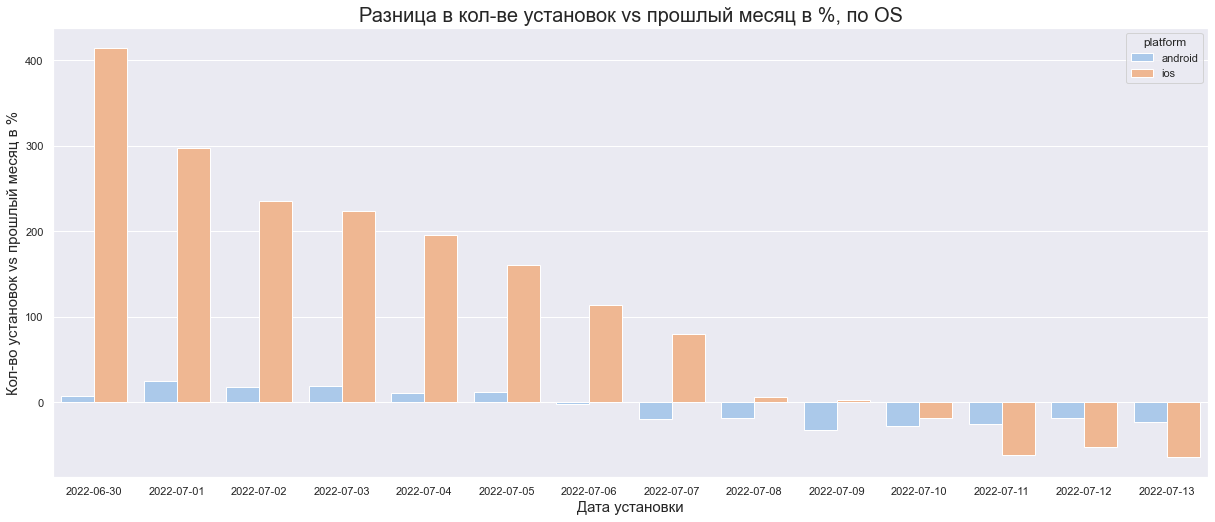

In [23]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_palette("pastel")
ax = sns.barplot(x="install_date", y="install_vs_ma", hue="platform", data=platform)
ax.set_xlabel("Дата установки", fontsize = 15)
ax.set_ylabel('Кол-во установок vs прошлый месяц в %', fontsize = 15)
ax.set_title("Разница в кол-ве установок vs прошлый месяц в %, по OS", fontsize = 20)

Text(0.5, 1.0, 'Разница в кол-ве сконвертировавшихся vs прошлый месяц в %, по OS')

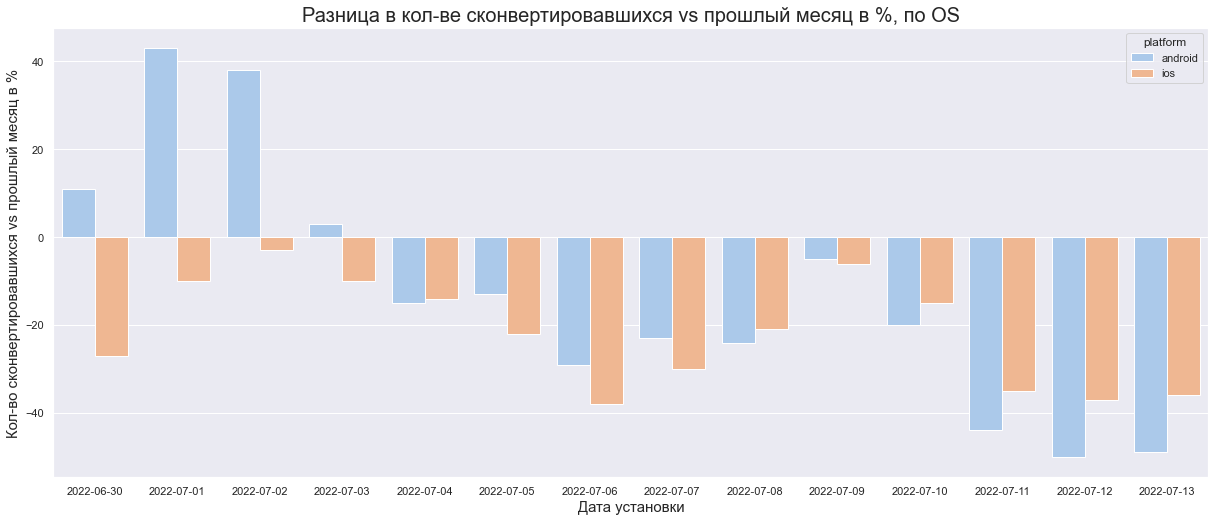

In [24]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_palette("pastel")
ax = sns.barplot(x="install_date", y="users_conv_vs_ma", hue="platform", data=platform)
ax.set_xlabel("Дата установки", fontsize = 15)
ax.set_ylabel('Кол-во сконвертировавшихся vs прошлый месяц в %', fontsize = 15)
ax.set_title("Разница в кол-ве сконвертировавшихся vs прошлый месяц в %, по OS", fontsize = 20)

In [25]:
#По сравнению с прошлым месяцем в основном припала конверсия по ios, т.к. количество инсталов выросло, а количество сконвертировавшихся пользователей - упало

Text(0.5, 1.0, 'Разница в конверсии vs прошлый год в %, по OS')

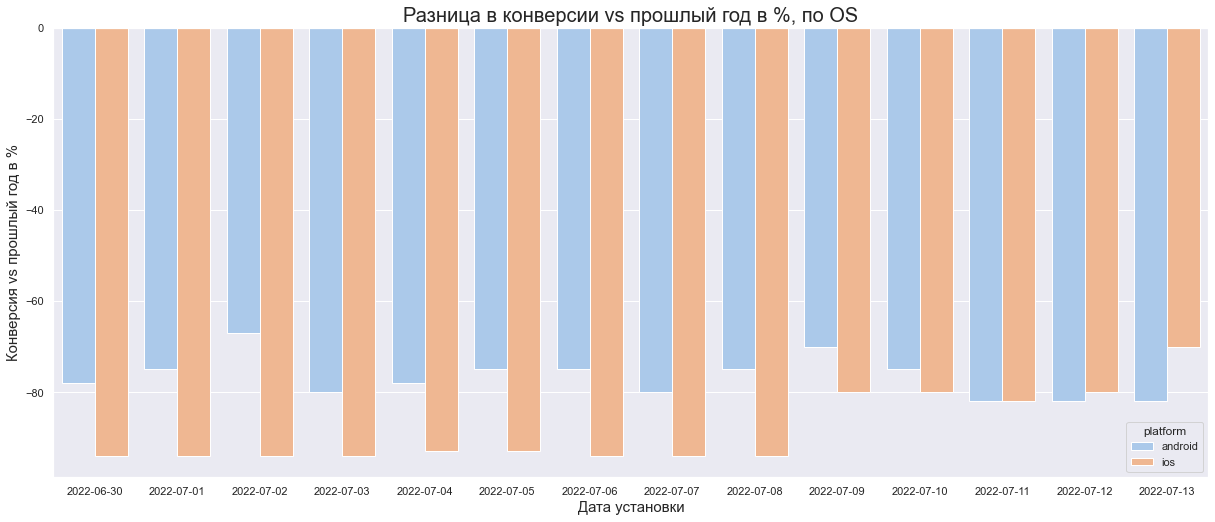

In [26]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_palette("pastel")
ax = sns.barplot(x="install_date", y="conv_vs_ya_percent", hue="platform", data=platform)
ax.set_xlabel("Дата установки", fontsize = 15)
ax.set_ylabel('Конверсия vs прошлый год в %', fontsize = 15)
ax.set_title("Разница в конверсии vs прошлый год в %, по OS", fontsize = 20)

Text(0.5, 1.0, 'Разница в конверсии vs прошлый год в п.п., по OS')

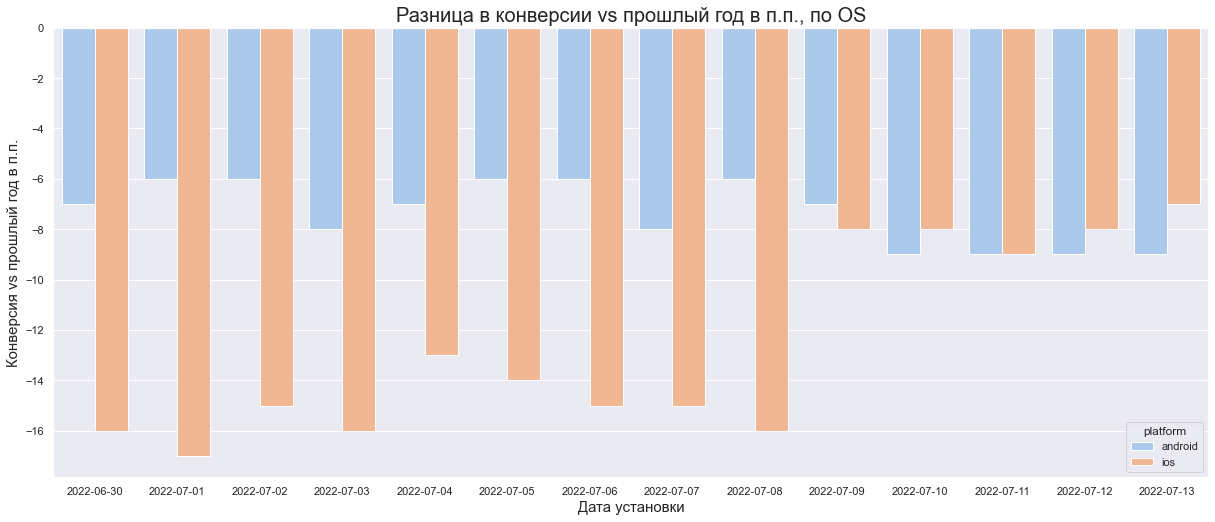

In [27]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_palette("pastel")
ax = sns.barplot(x="install_date", y="conv_vs_ya_pp", hue="platform", data=platform)
ax.set_xlabel("Дата установки", fontsize = 15)
ax.set_ylabel('Конверсия vs прошлый год в п.п.', fontsize = 15)
ax.set_title("Разница в конверсии vs прошлый год в п.п., по OS", fontsize = 20)

Text(0.5, 1.0, 'Разница в кол-ве установок vs прошлый год в %, по OS')

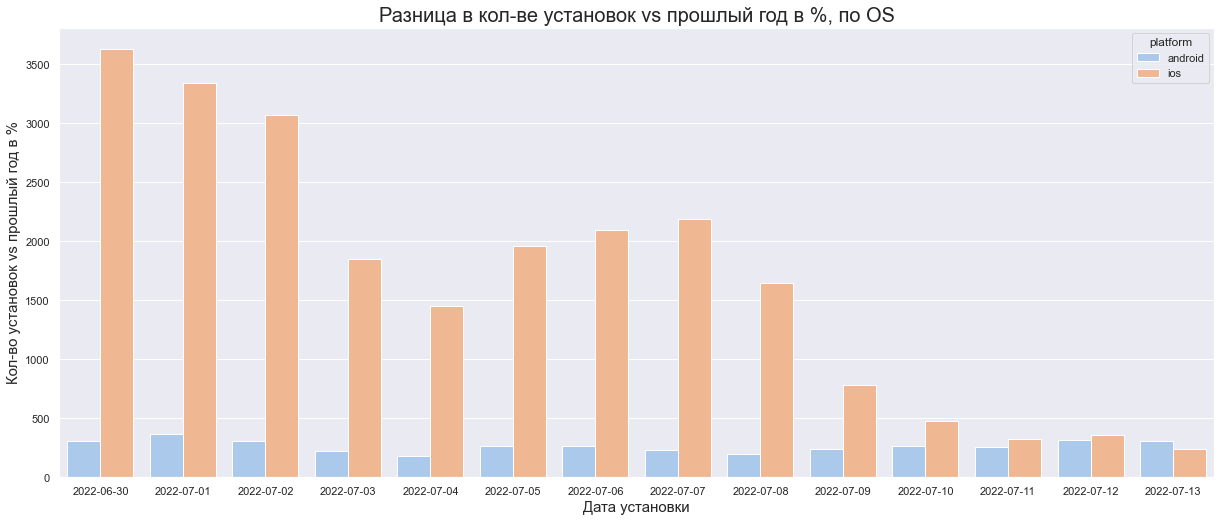

In [28]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_palette("pastel")
ax = sns.barplot(x="install_date", y="install_vs_ya", hue="platform", data=platform)
ax.set_xlabel("Дата установки", fontsize = 15)
ax.set_ylabel('Кол-во установок vs прошлый год в %', fontsize = 15)
ax.set_title("Разница в кол-ве установок vs прошлый год в %, по OS", fontsize = 20)

Text(0.5, 1.0, 'Разница в кол-ве сконвертировавшихся vs прошлый год в %, по OS')

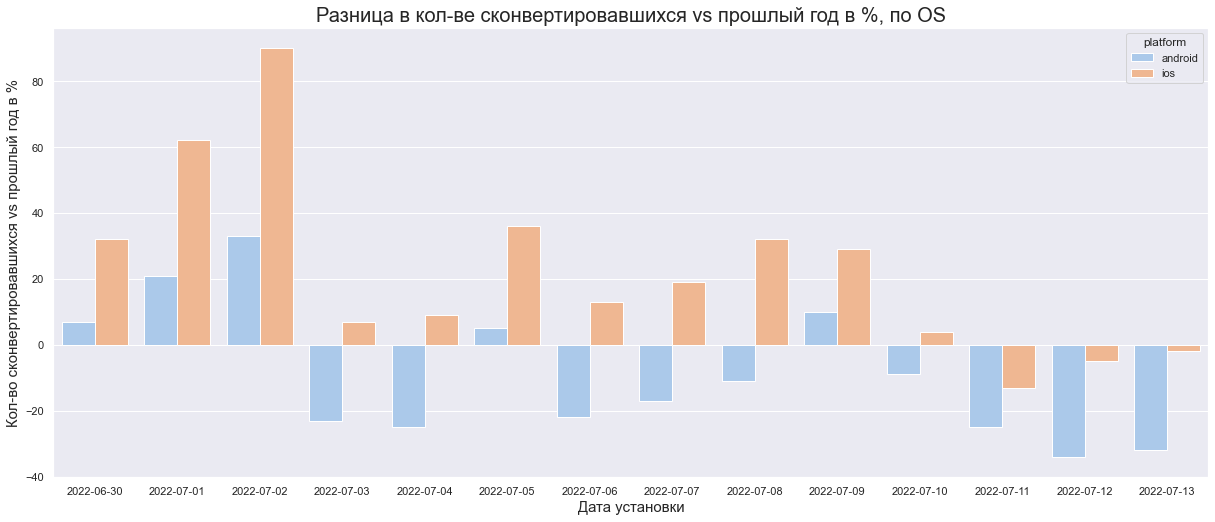

In [29]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_palette("pastel")
ax = sns.barplot(x="install_date", y="users_conv_vs_ya", hue="platform", data=platform)
ax.set_xlabel("Дата установки", fontsize = 15)
ax.set_ylabel('Кол-во сконвертировавшихся vs прошлый год в %', fontsize = 15)
ax.set_title("Разница в кол-ве сконвертировавшихся vs прошлый год в %, по OS", fontsize = 20)

In [30]:
#по сравнению с прошлым годом в основном упала также конверсия по ios, т.к. инсталов стало больше, а кол-во новичков не поспевает за его темпами роста

Text(0.5, 1.0, 'Разница в конверсии vs прошлый месяц в %, по дивизионам')

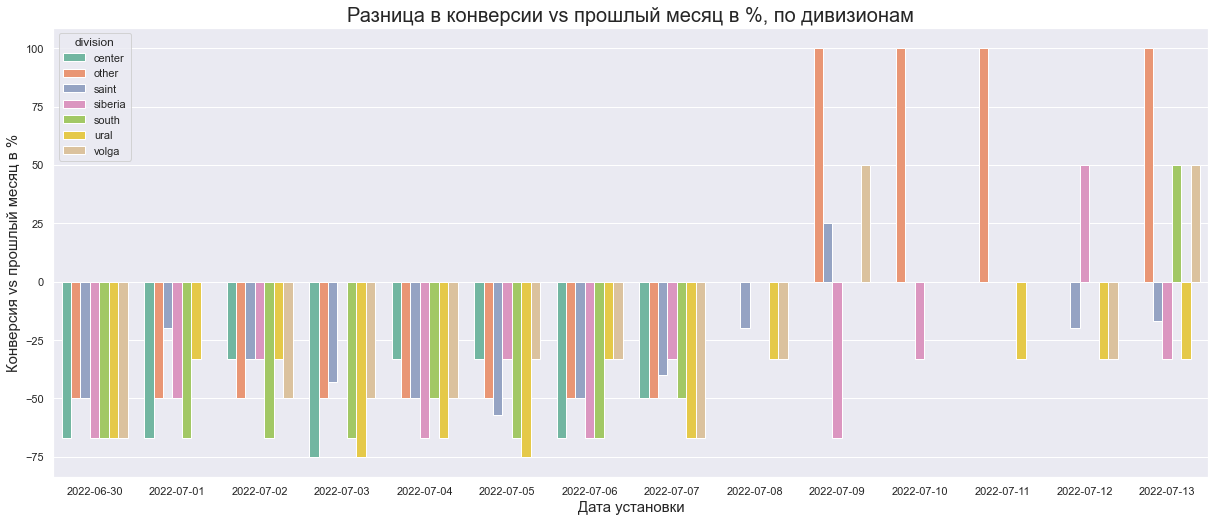

In [31]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_palette("Set2")
ax = sns.barplot(x="install_date", y="conv_vs_ma_percent", hue="division", data=division)
ax.set_xlabel("Дата установки", fontsize = 15)
ax.set_ylabel('Конверсия vs прошлый месяц в %', fontsize = 15)
ax.set_title("Разница в конверсии vs прошлый месяц в %, по дивизионам", fontsize = 20)

Text(0.5, 1.0, 'Разница в конверсии vs прошлый месяц в п.п., по дивизионам')

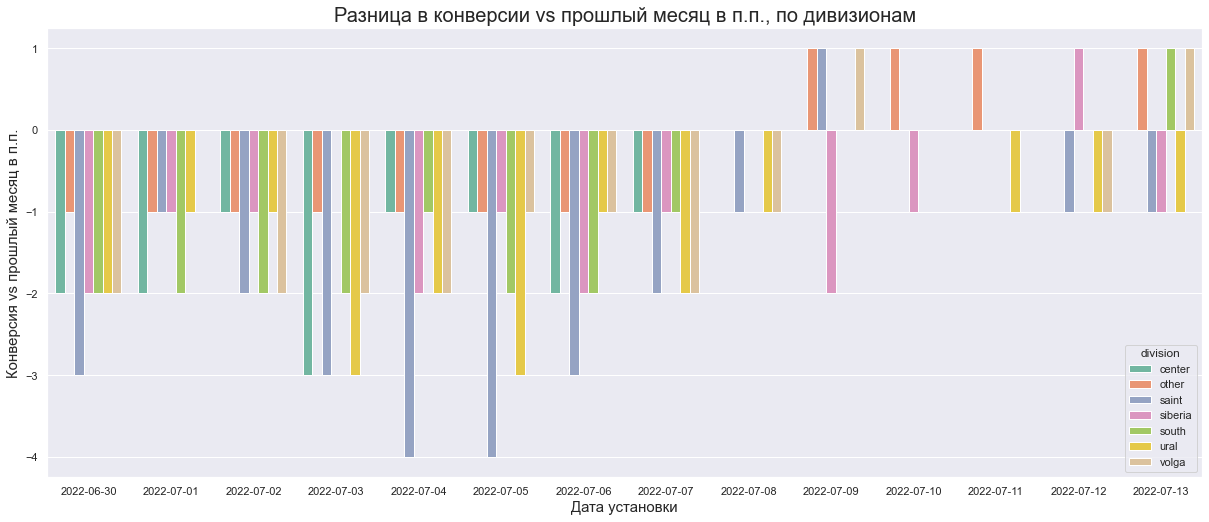

In [32]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_palette("Set2")
ax = sns.barplot(x="install_date", y="conv_vs_ma_pp", hue="division", data=division)
ax.set_xlabel("Дата установки", fontsize = 15)
ax.set_ylabel('Конверсия vs прошлый месяц в п.п.', fontsize = 15)
ax.set_title("Разница в конверсии vs прошлый месяц в п.п., по дивизионам", fontsize = 20)

In [33]:
#В п.п. по дивизионам сильнее всего падал СПб, Урал и Центр до 8 июля, далее уже все пошло вразнобой

Text(0.5, 1.0, 'Разница в кол-ве установок vs прошлый месяц в %, по дивизионам')

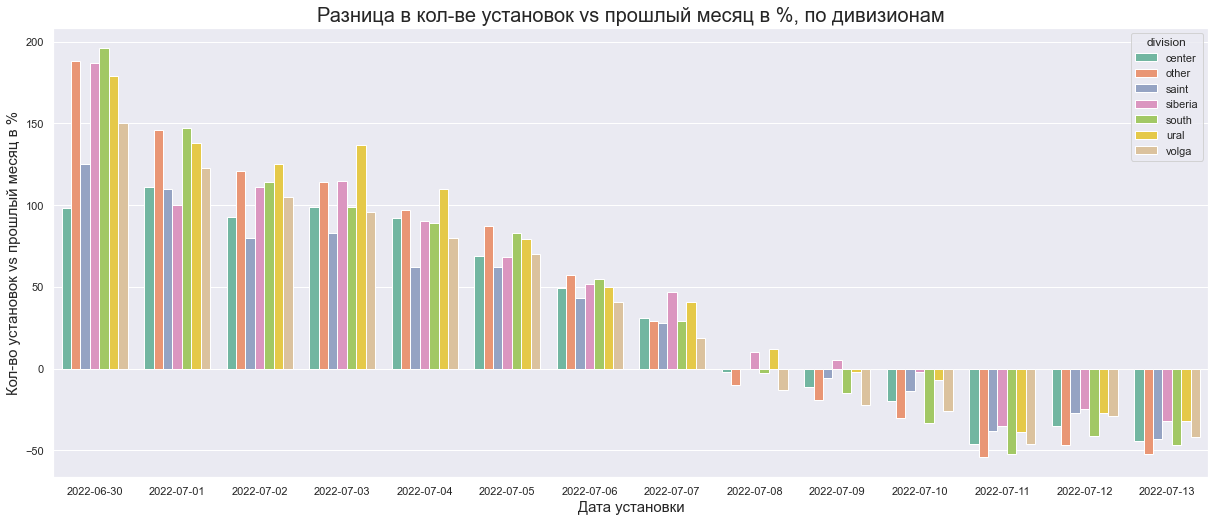

In [34]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_palette("Set2")
ax = sns.barplot(x="install_date", y="install_vs_ma", hue="division", data=division)
ax.set_xlabel("Дата установки", fontsize = 15)
ax.set_ylabel('Кол-во установок vs прошлый месяц в %', fontsize = 15)
ax.set_title("Разница в кол-ве установок vs прошлый месяц в %, по дивизионам", fontsize = 20)

In [35]:
#Месяц к месяцу количество установок по всем регионам выросло, и после 7го наоборот начало снижаться.

Text(0.5, 1.0, 'Разница в кол-ве сконвертировавшихся vs прошлый месяц в %, по дивизионам')

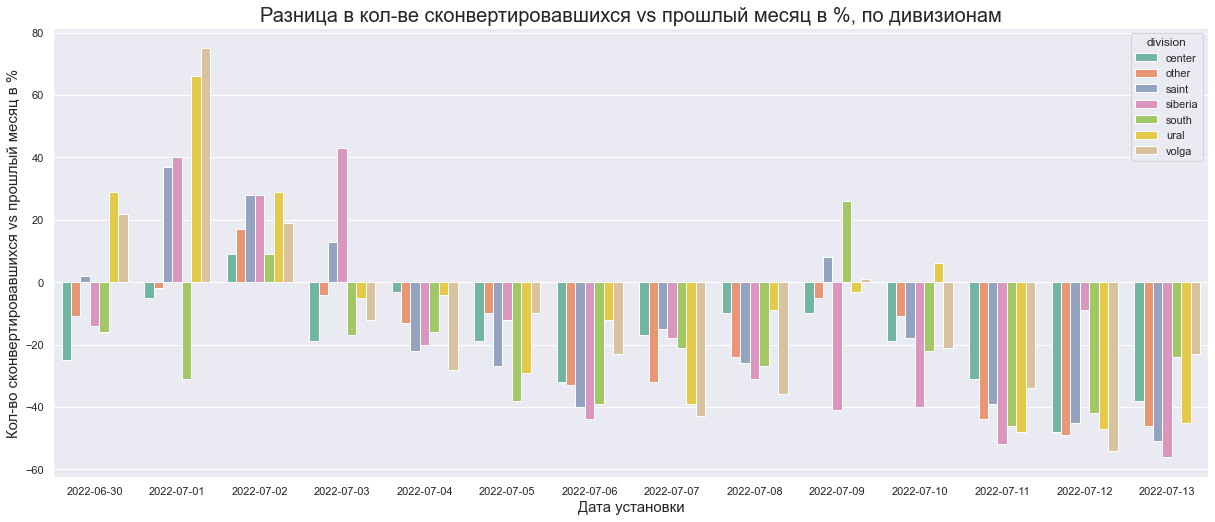

In [36]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_palette("Set2")
ax = sns.barplot(x="install_date", y="users_conv_vs_ma", hue="division", data=division)
ax.set_xlabel("Дата установки", fontsize = 15)
ax.set_ylabel('Кол-во сконвертировавшихся vs прошлый месяц в %', fontsize = 15)
ax.set_title("Разница в кол-ве сконвертировавшихся vs прошлый месяц в %, по дивизионам", fontsize = 20)

In [37]:
#Количество сконвертировавшихся с 4 июля в основном демонстрирует падение. Снижение конверсии до 8 июля было вызвано ростом инсталов.

Text(0.5, 1.0, 'Разница в конверсии vs прошлый год в %, по дивизионам')

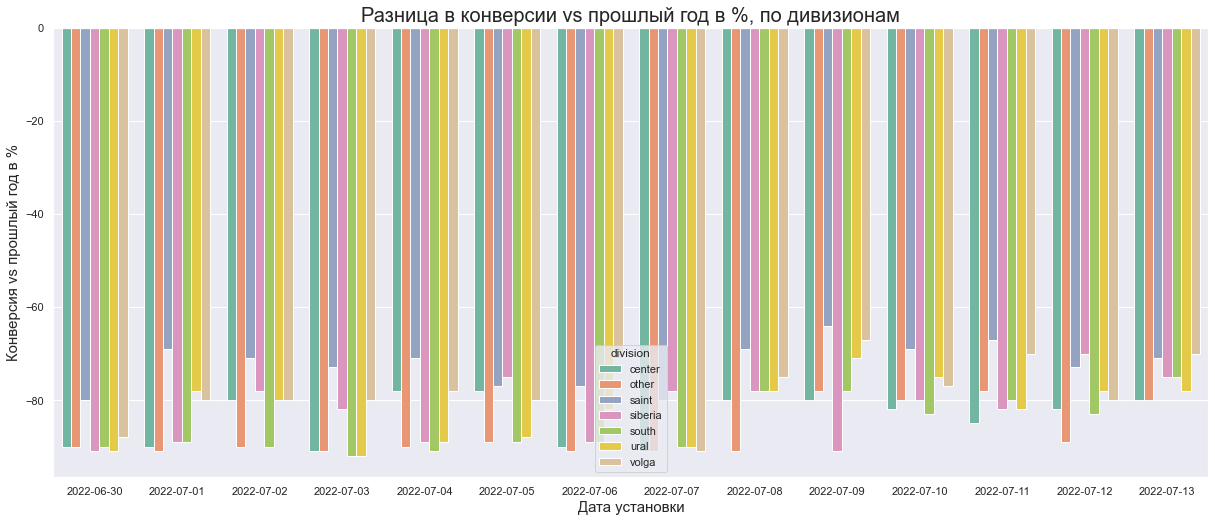

In [38]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_palette("Set2")
ax = sns.barplot(x="install_date", y="conv_vs_ya_percent", hue="division", data=division)
ax.set_xlabel("Дата установки", fontsize = 15)
ax.set_ylabel('Конверсия vs прошлый год в %', fontsize = 15)
ax.set_title("Разница в конверсии vs прошлый год в %, по дивизионам", fontsize = 20)

Text(0.5, 1.0, 'Разница в конверсии vs прошлый год в п.п., по дивизионам')

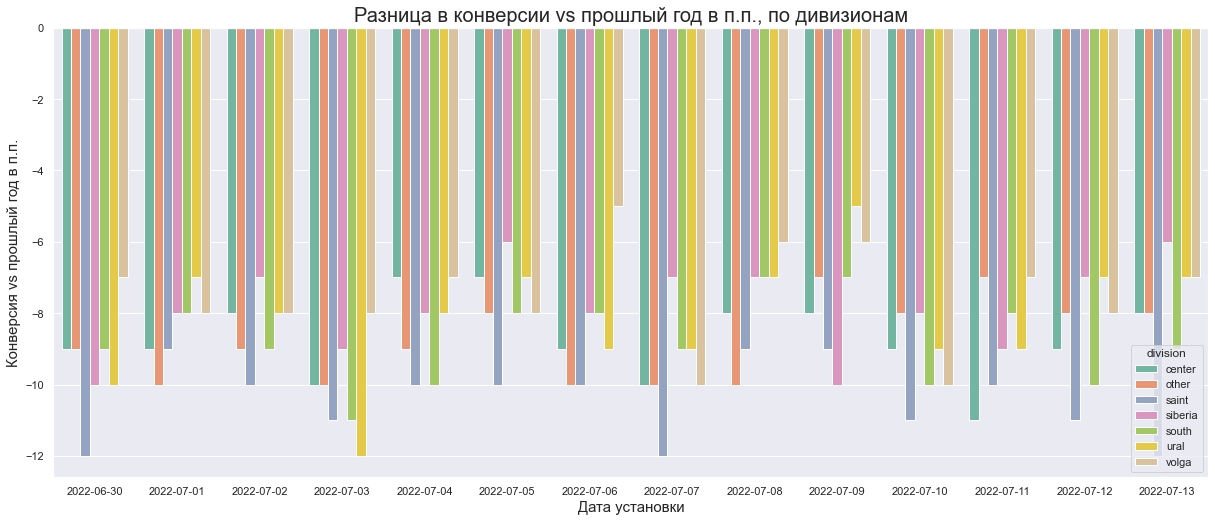

In [39]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_palette("Set2")
ax = sns.barplot(x="install_date", y="conv_vs_ya_pp", hue="division", data=division)
ax.set_xlabel("Дата установки", fontsize = 15)
ax.set_ylabel('Конверсия vs прошлый год в п.п.', fontsize = 15)
ax.set_title("Разница в конверсии vs прошлый год в п.п., по дивизионам", fontsize = 20)

Text(0.5, 1.0, 'Разница в кол-ве установок vs прошлый год в %, по дивизионам')

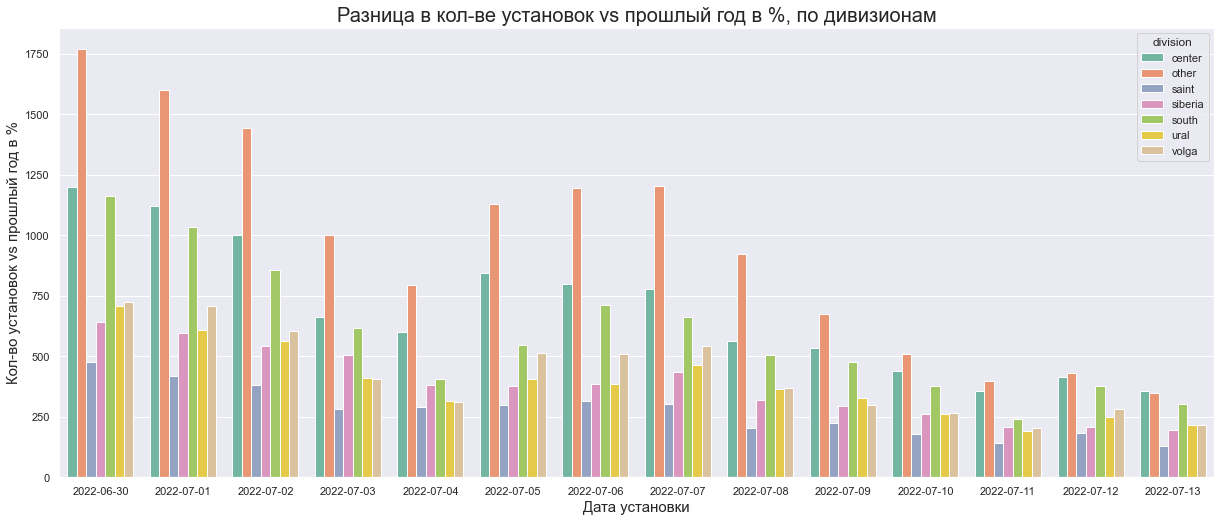

In [40]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_palette("Set2")
ax = sns.barplot(x="install_date", y="install_vs_ya", hue="division", data=division)
ax.set_xlabel("Дата установки", fontsize = 15)
ax.set_ylabel('Кол-во установок vs прошлый год в %', fontsize = 15)
ax.set_title("Разница в кол-ве установок vs прошлый год в %, по дивизионам", fontsize = 20)

Text(0.5, 1.0, 'Разница в кол-ве сконвертировавшихся vs прошлый год в %, по дивизионам')

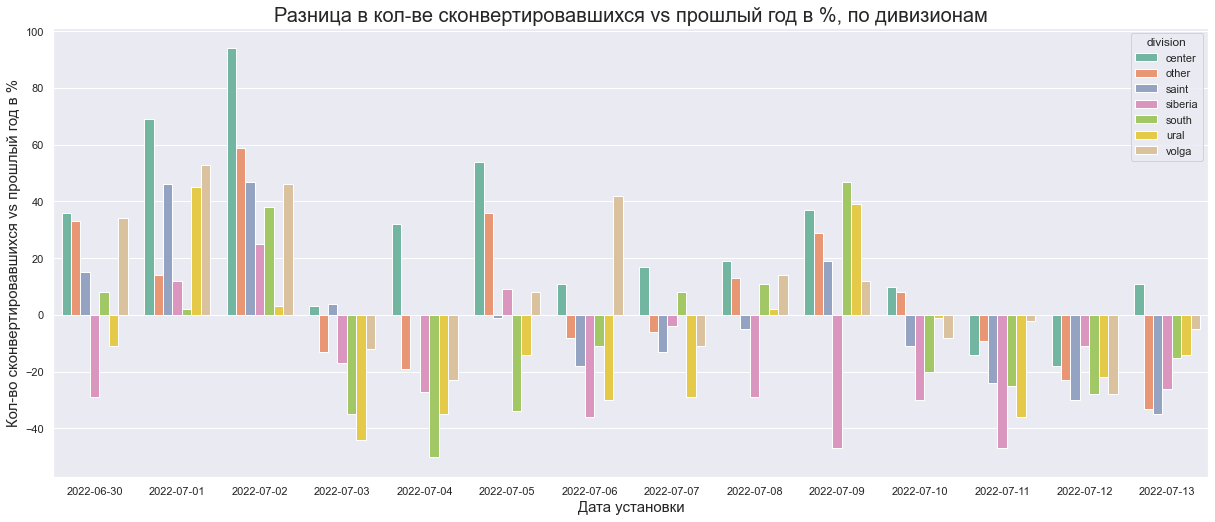

In [41]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_palette("Set2")
ax = sns.barplot(x="install_date", y="users_conv_vs_ya", hue="division", data=division)
ax.set_xlabel("Дата установки", fontsize = 15)
ax.set_ylabel('Кол-во сконвертировавшихся vs прошлый год в %', fontsize = 15)
ax.set_title("Разница в кол-ве сконвертировавшихся vs прошлый год в %, по дивизионам", fontsize = 20)

In [42]:
#Конверсия год к году падает во всех дивизионах, т.к. установки растут, а количество новичков - не везде и не всегда, довольно неравномерно по когортам.